In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
! cp drive/MyDrive/DMG/Assignment3/Mall_Customers.csv .
! cp drive/MyDrive/DMG/Assignment3/wine.data .
! cp drive/MyDrive/DMG/Assignment3/Iris.csv .

In [ ]:
import random
def bootstrap_func(data_arr):
  new_arr = []
  length = len(data_arr)
  for i in range(length):
    index = random.randrange(0, length, 1)
    new_arr.append(data_arr[index])
  new_arr = np.array(new_arr)
  return new_arr

In [ ]:
!pip install -U scikit-fuzzy

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
def cluster_func_visualization(data_normalized,labels):
  tsne = TSNE(n_components=2)
  X_tsne = tsne.fit_transform(data_normalized)
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)

In [ ]:
from scipy.stats import entropy
def intrinsic(ground_truth, labels):
  a = len(np.unique(ground_truth))
  b = len(np.unique(labels))
  factor = 1
  if(a > b):
    factor = b/a
  purity = []
  entropy_list = []
  prob_arr = []
  count = 0
  count_dict = {}
  previous_val = ground_truth[0]
  for i in range(len(ground_truth)):
    if(previous_val != ground_truth[i]):
      max_count = 0
      for label in count_dict:
        prob_arr.append(count_dict[label]/count)
        if(count_dict[label] > max_count):
          max_count = count_dict[label]
      purity.append(max_count/count * factor)
      entropy_list.append(entropy(prob_arr,base=2))
      count_dict = {}
      previous_val = ground_truth[i]
      count = 0
      prob_arr = []
    count+=1
    if labels[i] in count_dict:
      count_dict[labels[i]] +=1
    else:
      count_dict[labels[i]] = 1
  if(previous_val!= None):
    max_count = 0
    for label in count_dict:
      if(count_dict[label] > max_count):
        prob_arr.append(count_dict[label]/count)
        max_count = count_dict[label]
    purity.append(max_count/count * factor)
    entropy_list.append(entropy(prob_arr,base=2))
    count_dict = {}
  print("Cluster purities are {}".format(purity))
  print("Entropies of clusters are {}".format(entropy_list))

In [ ]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
def cluster_evaluation(data,c_labels,ground_truth):
  print("Silhouette Coefficient is {}".format(silhouette_score(data, c_labels)))
  print("Davies Bouldin index is {}".format(davies_bouldin_score(data, c_labels)))
  intrinsic(ground_truth,c_labels)

In [ ]:
import pandas as pd
data = pd.read_csv("wine.data")

In [ ]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
data_x = np.array(data.loc[:,data.columns != "1"])
data_y = np.array(data.loc[:,data.columns == "1"])
data_y = [x[0] for x in data_y]
data_array = np.array(data_x)
normalizer.fit(data_array)
data_normalized = normalizer.transform(data_array)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficient is 0.2835806364948403
Davies Bouldin index is 1.3938085497845032
Cluster purities are [1.0, 0.9154929577464789, 1.0]
Entropies of clusters are [0.0, 0.5023713046993796, 0.0]


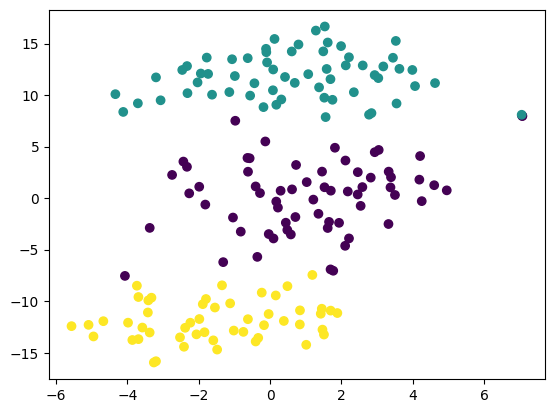

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=0)
labels = kmeans.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

Silhouette Coefficient is 0.2822191179625171
Davies Bouldin index is 1.4108914315216519
Cluster purities are [1.0, 0.9154929577464789, 1.0]
Entropies of clusters are [0.0, 0.5023713046993796, 0.0]


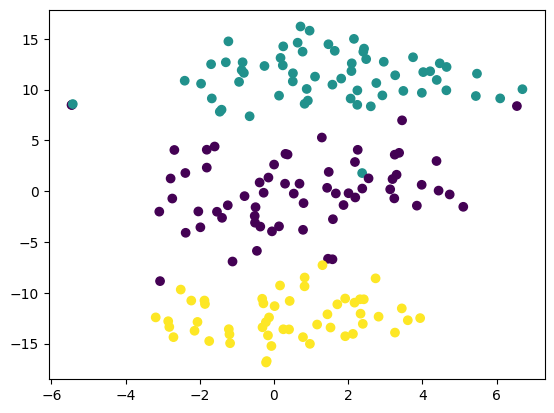

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
labels = gmm.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

Silhouette Coefficient is 0.2618580811561529
Davies Bouldin index is 1.8708537647993888
Cluster purities are [0.9827586206896551, 0.6197183098591549, 1.0]
Entropies of clusters are [0.1256580501725674, 1.1884218908096282, 0.0]


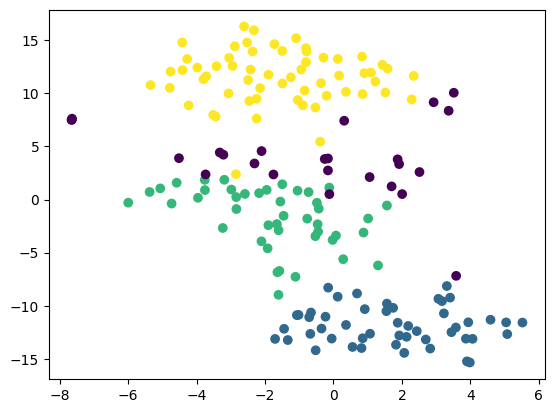

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
labels = gmm.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

Silhouette Coefficient is 0.25642458891050723
Davies Bouldin index is 1.5350915816530752
Cluster purities are [0.6666666666666666, 0.431924882629108, 0.6666666666666666]
Entropies of clusters are [0.0, 0.935940714955517, 0.0]


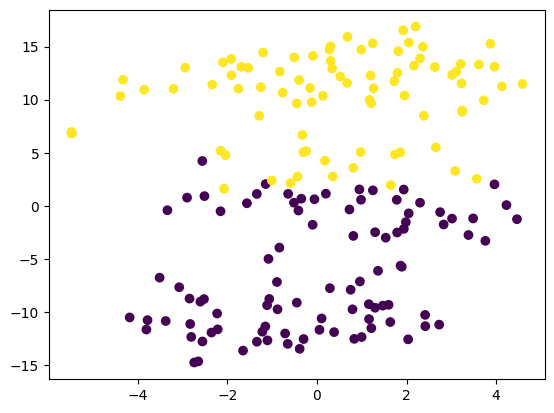

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
labels = gmm.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

Silhouette Coefficient is 0.2829669172404775
Davies Bouldin index is 1.3911584090935172
Cluster purities are [1.0, 0.9295774647887324, 1.0]
Entropies of clusters are [0.0, 0.4358752972536765, 0.0]


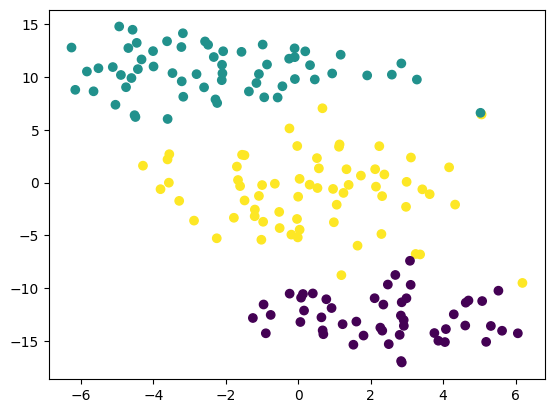

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3,covariance_type = "tied")
labels = gmm.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

Silhouette Coefficient is 0.2357722923872909
Davies Bouldin index is 1.3196720232026868
Cluster purities are [0.9310344827586207, 0.9436619718309859, 1.0]
Entropies of clusters are [0.36205125173399794, 0.31273337639664334, 0.0]


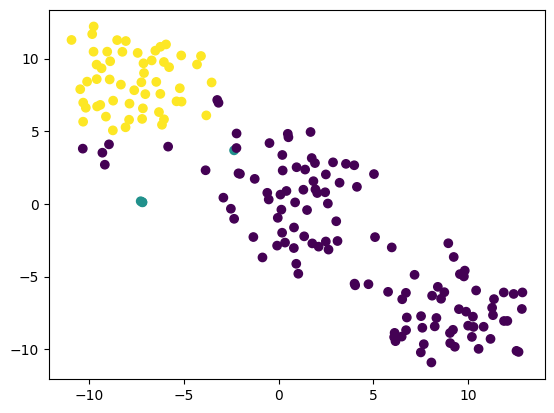

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3,covariance_type = "spherical")
labels = gmm.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

Silhouette Coefficient is 0.28275461060285334
Davies Bouldin index is 1.3987606379574344
Cluster purities are [1.0, 0.9014084507042254, 1.0]
Entropies of clusters are [0.0, 0.5616501124319571, 0.0]


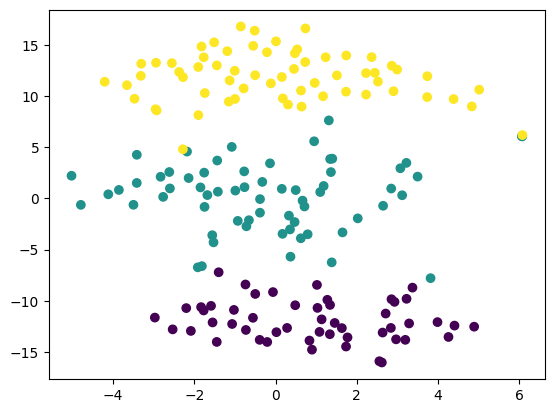

In [ ]:
from skfuzzy.cluster import cmeans
cntr,u,u0,d,jm,p,fpc = cmeans(np.transpose(data_normalized),3, 2, error=0.001, maxiter=10000,seed = 100)
labels = np.argmax(u, axis=0)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

Silhouette Coefficient is 0.2570612661949792
Davies Bouldin index is 1.5372554470659698
Cluster purities are [0.6666666666666666, 0.36619718309859156, 0.6666666666666666]
Entropies of clusters are [0.0, 0.9929768866085175, 0.0]


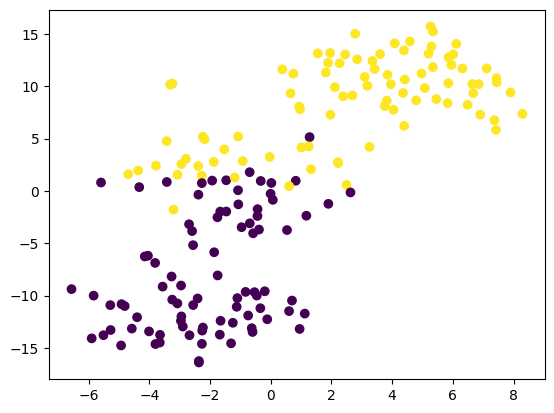

In [ ]:
from skfuzzy.cluster import cmeans
cntr,u,u0,d,jm,p,fpc = cmeans(np.transpose(data_normalized),2, 2, error=0.001, maxiter=10000,seed = 100)
labels = np.argmax(u, axis=0)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

Silhouette Coefficient is 0.23866010057072495
Davies Bouldin index is 1.9424114659252232
Cluster purities are [0.9655172413793104, 0.5915492957746479, 1.0]
Entropies of clusters are [0.21639693245126465, 1.3149398057556803, 0.0]


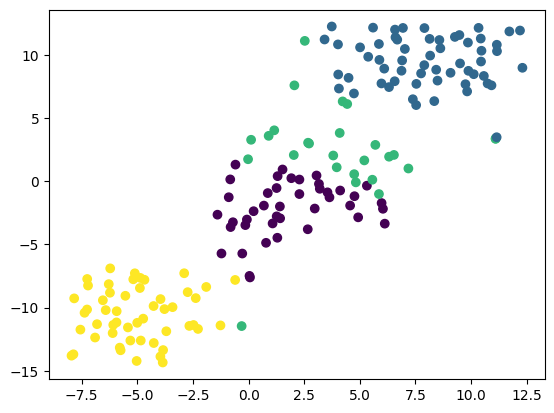

In [ ]:
from skfuzzy.cluster import cmeans
cntr,u,u0,d,jm,p,fpc = cmeans(np.transpose(data_normalized),4, 2, error=0.001, maxiter=10000,seed = 100)
labels = np.argmax(u, axis=0)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

Silhouette Coefficient is 0.2835806364948403
Davies Bouldin index is 1.3938085497845032
Cluster purities are [1.0, 0.9154929577464789, 1.0]
Entropies of clusters are [0.0, 0.5023713046993796, 0.0]


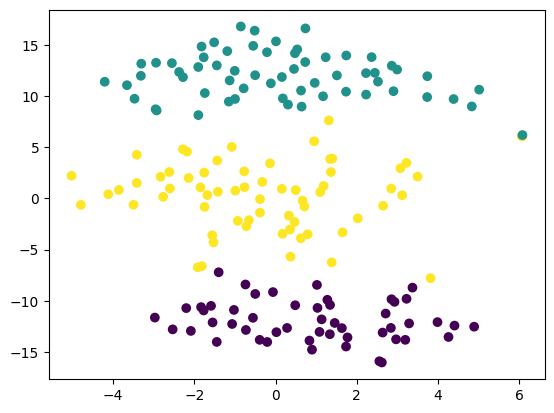

In [ ]:
from skfuzzy.cluster import cmeans
cntr,u,u0,d,jm,p,fpc = cmeans(np.transpose(data_normalized),3, 1.001, error=0.001, maxiter=10000,seed = 100)
labels = np.argmax(u, axis=0)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

Silhouette Coefficient is 0.2835806364948403
Davies Bouldin index is 1.3938085497845032
Cluster purities are [1.0, 0.9154929577464789, 1.0]
Entropies of clusters are [0.0, 0.5023713046993796, 0.0]


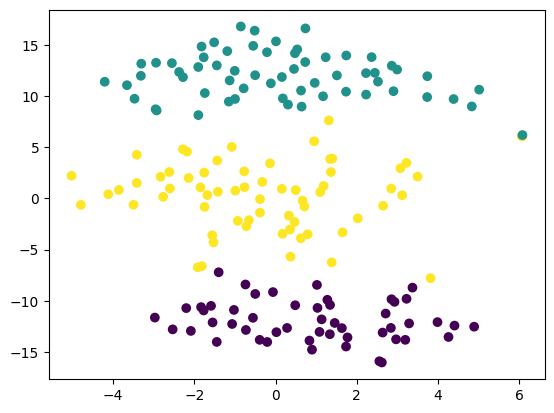

In [ ]:
from skfuzzy.cluster import cmeans
cntr,u,u0,d,jm,p,fpc = cmeans(np.transpose(data_normalized),3, 1.75, error=0.001, maxiter=10000,seed = 100)
labels = np.argmax(u, axis=0)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

Silhouette Coefficient is 0.25368668160743807
Davies Bouldin index is 1.4348933863733029
Cluster purities are [1.0, 0.6338028169014085, 1.0]
Entropies of clusters are [0.0, 1.3076274564909722, 0.0]


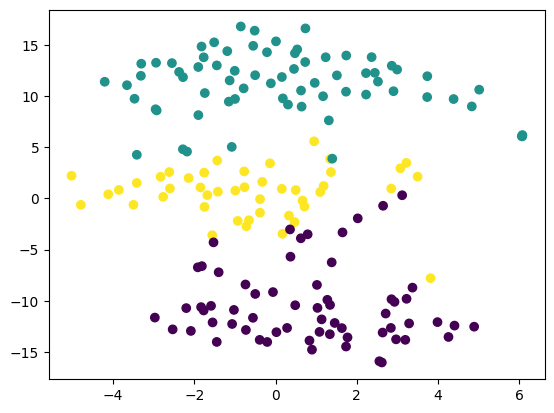

In [ ]:
from skfuzzy.cluster import cmeans
cntr,u,u0,d,jm,p,fpc = cmeans(np.transpose(data_normalized),3, 3, error=0.001, maxiter=10000,seed = 100)
labels = np.argmax(u, axis=0)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

Silhouette Coefficient is 0.2664546615310252
Davies Bouldin index is 1.452804495697306
Cluster purities are [0.3620689655172414, 0.38028169014084506, 0.375]
Entropies of clusters are [1.5819820527181976, 1.5696204989665146, 0.0]


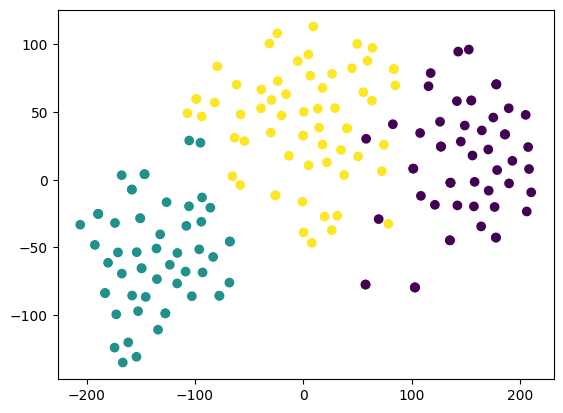

In [ ]:
new_data = bootstrap_func(data_normalized)
gmm = GaussianMixture(n_components=3)
labels = gmm.fit_predict(new_data)
cluster_func_visualization(new_data,labels)
cluster_evaluation(new_data,labels,data_y)

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("Iris.csv")
data["Species"] = data["Species"].apply(lambda x: 0 if x=='Iris-setosa'else
                                           2 if x == "Iris-virginica" else 1 )

In [ ]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
data_x = np.array(data.loc[:,data.columns != "Species"])
data_y = np.array(data.loc[:,data.columns == "Species"])
data_y = [x[0] for x in data_y]
data_array = np.array(data_x)
normalizer.fit(data_array)
data_normalized = normalizer.transform(data_array)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficient is 0.452949780355554
Davies Bouldin index is 0.8965837268667695
Cluster purities are [1.0, 0.96, 0.9]
Entropies of clusters are [0.0, 0.24229218908241482, 0.0]


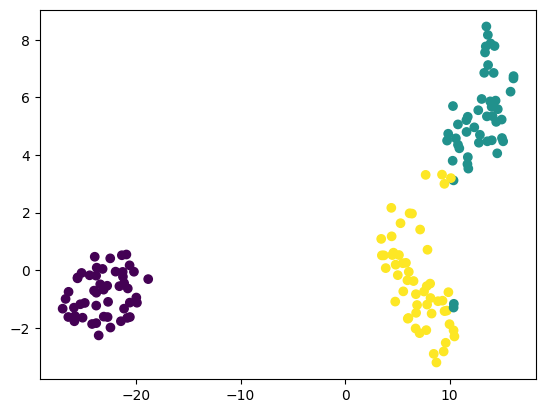

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=0)
labels = kmeans.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

Silhouette Coefficient is 0.44249183226269917
Davies Bouldin index is 0.9394650030453118
Cluster purities are [1.0, 1.0, 1.0]
Entropies of clusters are [0.0, 0.0, 0.0]


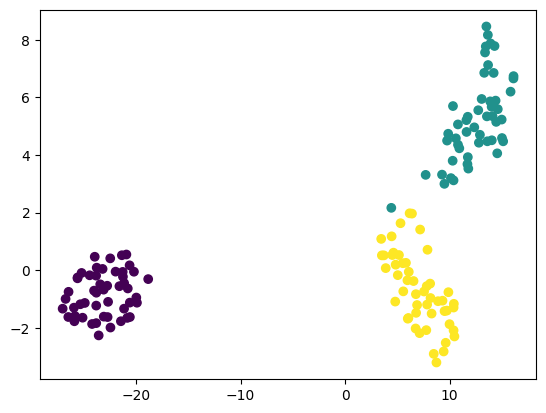

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
labels = gmm.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

Silhouette Coefficient is 0.45231919470216203
Davies Bouldin index is 0.8956000146048186
Cluster purities are [1.0, 0.96, 0.88]
Entropies of clusters are [0.0, 0.24229218908241482, 0.0]


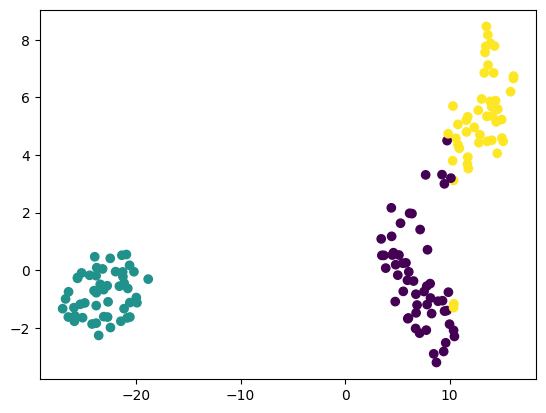

In [ ]:
from skfuzzy.cluster import cmeans
cntr,u,u0,d,jm,p,fpc = cmeans(np.transpose(data_normalized),3, 2, error=0.001, maxiter=10000,seed = 100)
labels = np.argmax(u, axis=0)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

Silhouette Coefficient is 0.49162911834836187
Davies Bouldin index is 0.8147419838145042
Cluster purities are [0.4, 0.34, 0.4]
Entropies of clusters are [1.5632332590779805, 1.584381457724494, 0.9852281360342514]


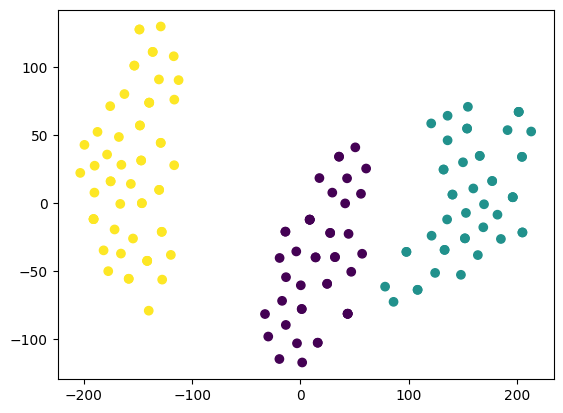

In [ ]:
new_data = bootstrap_func(data_normalized)
gmm = GaussianMixture(n_components=3)
labels = gmm.fit_predict(new_data)
cluster_func_visualization(new_data,labels)
cluster_evaluation(new_data,labels,data_y)

In [ ]:
import pandas as pd
data = pd.read_csv("Mall_Customers.csv")
data = data.drop(["CustomerID"], axis = 1)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
data_array = data[["Annual Income (k$)","Spending Score (1-100)"]]
normalizer = StandardScaler()
normalizer.fit(data_array)
data_normalized = data_array

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficient is 0.46761358158775435
Davies Bouldin index is 0.715276820248462


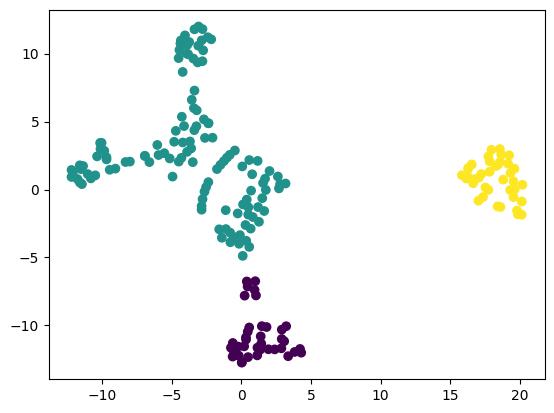

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=0)
labels = kmeans.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
print("Silhouette Coefficient is {}".format(silhouette_score(data_normalized, labels)))
print("Davies Bouldin index is {}".format(davies_bouldin_score(data_normalized, labels)))

Silhouette Coefficient is 0.4310103691306562
Davies Bouldin index is 0.7039397900724352


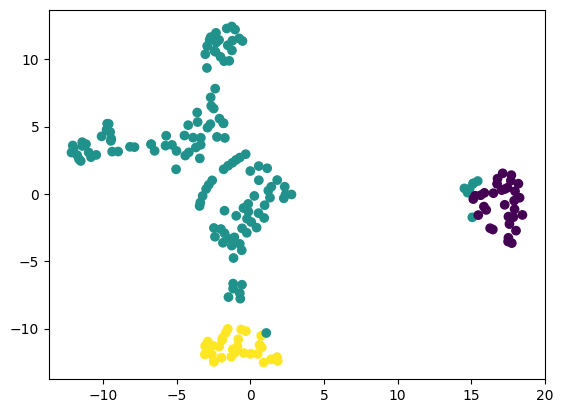

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
labels = gmm.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
print("Silhouette Coefficient is {}".format(silhouette_score(data_normalized, labels)))
print("Davies Bouldin index is {}".format(davies_bouldin_score(data_normalized, labels)))

Silhouette Coefficient is 0.46761358158775435
Davies Bouldin index is 0.715276820248462


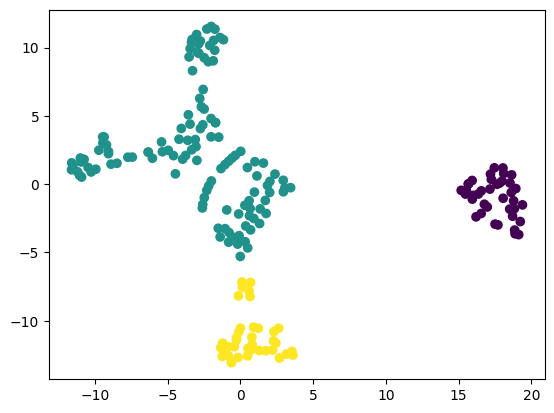

In [ ]:
from skfuzzy.cluster import cmeans
cntr,u,u0,d,jm,p,fpc = cmeans(np.transpose(data_normalized),3, 2, error=0.001, maxiter=10000,seed = 100)
labels = np.argmax(u, axis=0)
cluster_func_visualization(data_normalized,labels)
print("Silhouette Coefficient is {}".format(silhouette_score(data_normalized, labels)))
print("Davies Bouldin index is {}".format(davies_bouldin_score(data_normalized, labels)))

Silhouette Coefficient is 0.4191137821992875
Davies Bouldin index is 0.9653986091772658
Cluster purities are [0.5, 0.56, 0.68]
Entropies of clusters are [1.4854752972273346, 1.4056780552463375, 0.6593758812786993]


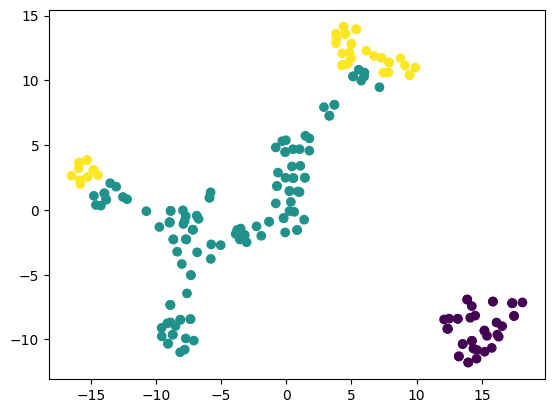

In [ ]:
data_normalized = np.array(data_normalized)
new_data = bootstrap_func(data_normalized)
gmm = GaussianMixture(n_components=3)
labels = gmm.fit_predict(new_data)
cluster_func_visualization(new_data,labels)
cluster_evaluation(new_data,labels,data_y)